## Imports

In [12]:
def revArr(arr, start, end):
    if start< end:
        arr[start], arr[end] = arr[end], arr[start]
        revArr(arr, start+1, end-1)
    
    print(arr)
    

arr = [1,2,3,4, 5]
revArr(arr, 0, len(arr)-1)

[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]
[5, 4, 3, 2, 1]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from neuralprophet import NeuralProphet
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

c:\Miniconda3\envs\intern\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


## Load Data

In [2]:
df_week_2020_23 = pd.read_csv('./VolumeDataset_2020_to_2023.csv').drop('Unnamed: 0', axis=1)
df_daily_2021_23 = pd.read_csv('./data_dailly_2021_to_2023.csv')
jan_df = pd.read_excel('./jan_2024.xlsx')


### Convert Week to Month

In [ ]:
df_daily_2021_23

,Unnamed: 0,Date,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
0,0,2021-01-01,605.02,1726.52,5337.17,468.38,21401.74,24508.57,2400.00,60931.20,9387.48,540.80,3249.30,35848.57,6105.0,172509.52,172509.52
1,1,2021-01-02,196.68,1564.11,5396.61,216.00,26037.07,28410.74,NaN,57619.45,13055.97,483.60,2261.28,40121.49,6360.0,181722.80,181722.80
2,2,2021-01-03,236.21,1798.70,4397.97,411.94,26628.81,27061.66,NaN,51113.54,13176.51,697.16,2672.50,46251.51,2715.0,177161.26,177161.26
3,3,2021-01-04,127.75,2009.93,4667.26,372.25,28270.30,15970.95,NaN,53456.41,15575.81,755.58,2702.25,59565.27,2225.0,185698.56,185698.56
4,4,2021-01-05,165.57,1833.25,4636.69,292.70,22619.43,22700.87,NaN,64673.62,15496.28,677.17,2643.65,52591.89,1875.0,190205.91,190205.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,2023-12-27,NaN,832.94,14631.52,5177.56,18987.66,14405.40,3137.71,53483.93,12617.75,3295.78,1788.66,23891.08,NaN,152249.70,152249.70
1091,1091,2023-12-28,NaN,857.11,15744.12,6144.63,15145.49,13923.45,11208.34,62637.56,8182.95,3269.21,1936.83,24990.42,NaN,164039.80,164039.80
1092,1092,2023-12-29,NaN,976.60,16012.12,8232.52,16015.12,15187.10,14147.13,54784.41,5435.54,4332.64,2119.05,30622.05,NaN,167863.97,167863.97
1093,1093,2023-12-30,NaN,983.61,15857.66,3259.49,15307.54,17874.66,16044.70,49197.65,7813.36,3793.81,2086.32,25511.73,NaN,157730.25,157730.25


In [ ]:
data = []
temp_dp = []
c1 = c2 = 0
bulk = 1
for i in range(1, df_week_2020_23.shape[0]+1):

    temp_dp.append(df_week_2020_23.iloc[i-1].values[2:])
    
    c1+=1
    temp = [bulk]
    if c2 == 2 and c1 == 5:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp.extend(dp)
        temp_dp.clear()
        data.append(temp)
        bulk+=1
        c1=c2 = 0
        
    elif c2 != 2 and c1 == 4:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp_dp.clear()
        temp.extend(dp)
        data.append(temp)
        bulk+=1
        c1 = 0
new_col = ['Month']
new_col.extend(df_week_2020_23.columns[2:])
df_month = pd.DataFrame(data, columns=new_col)

# df_daily_2021_23['Date'] = pd.to_datetime(df_daily_2021_23['Date'],format='%d-%m-%Y')
# # df_daily_2021_23.sort_values(by='Date', inplace=True)
# # df_daily_2021_23.reset_index(inplace=True, drop=True)
# for col in  df_daily_2021_23.columns[1:]:
#     df_daily_2021_23[col] = pd.to_numeric(df_daily_2021_23[col], errors='coerce')

In [ ]:
df_daily_2021_23['Date'] = pd.to_datetime(df_daily_2021_23['Date'],format='%d-%m-%Y')
for col in  df_daily_2021_23.columns[1:]:
    df_daily_2021_23[col] = pd.to_numeric(df_daily_2021_23[col], errors='coerce')

ValueError: time data "2021-01-01" doesn't match format "%d-%m-%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df_daily_2021_23.dtypes

Date              datetime64[ns]
A1                       float64
A2                       float64
E1                       float64
E2                       float64
N1                       float64
N2                       float64
N3                       float64
S1                       float64
S2                       float64
S3                       float64
W1                       float64
W2                       float64
W3                       float64
Cleared Volume           float64
MCV                      float64
dtype: object

In [ ]:
df_daily_2021_23.to_csv('data_dailly_2021_to_2023.csv')

In [3]:
data = []
temp_dp = []
c1 = 0
c2 = 0
bulk = 1
for i in range(1, df_week_2020_23.shape[0]+1):

    temp_dp.append(df_week_2020_23.iloc[i-1].values[2:])
    
    c1+=1
    temp = [bulk]
    if c2 == 2 and c1 == 5:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp.extend(dp)
        temp_dp.clear()
        data.append(temp)
        bulk+=1
        c1 = 0
        c2 = 0
        
    elif c2 != 2 and c1 == 4:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp_dp.clear()
        temp.extend(dp)
        data.append(temp)
        bulk+=1
        c1 = 0
        c2+=1
new_col = ['Month']
new_col.extend(df_week_2020_23.columns[2:])
df_month = pd.DataFrame(data, columns=new_col)
df_month.tail()

,Month,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
43,44,22411.72,41128.26,572689.06,56012.96,523909.46,555439.12,95327.51,286559.85,76931.25,2172.0,509126.54,206086.49,663622.73,3611411.32,3611411.32
44,45,37421.51,73789.94,608920.21,122381.05,245947.63,861581.84,53327.75,274095.10,223428.94,3364.8,360978.43,291047.66,711802.93,3868080.96,3868080.96
45,46,18539.31,83257.88,484434.48,173329.14,331116.93,559269.76,27708.81,188944.13,185487.60,2392.8,647655.81,246147.04,1014516.22,3962793.79,3962858.68
46,47,30038.31,69756.13,691389.45,385243.98,223272.02,916834.96,115062.60,148553.21,112975.69,3549.1,416574.42,140617.59,1291486.01,4545347.16,4545613.50
47,48,23498.75,10310.91,673174.53,541611.02,266429.40,881227.63,2459.64,124086.28,86549.90,2287.2,816101.48,148610.54,2065983.76,5642323.78,5642323.78


### Box plot of of area-time

<Axes: >

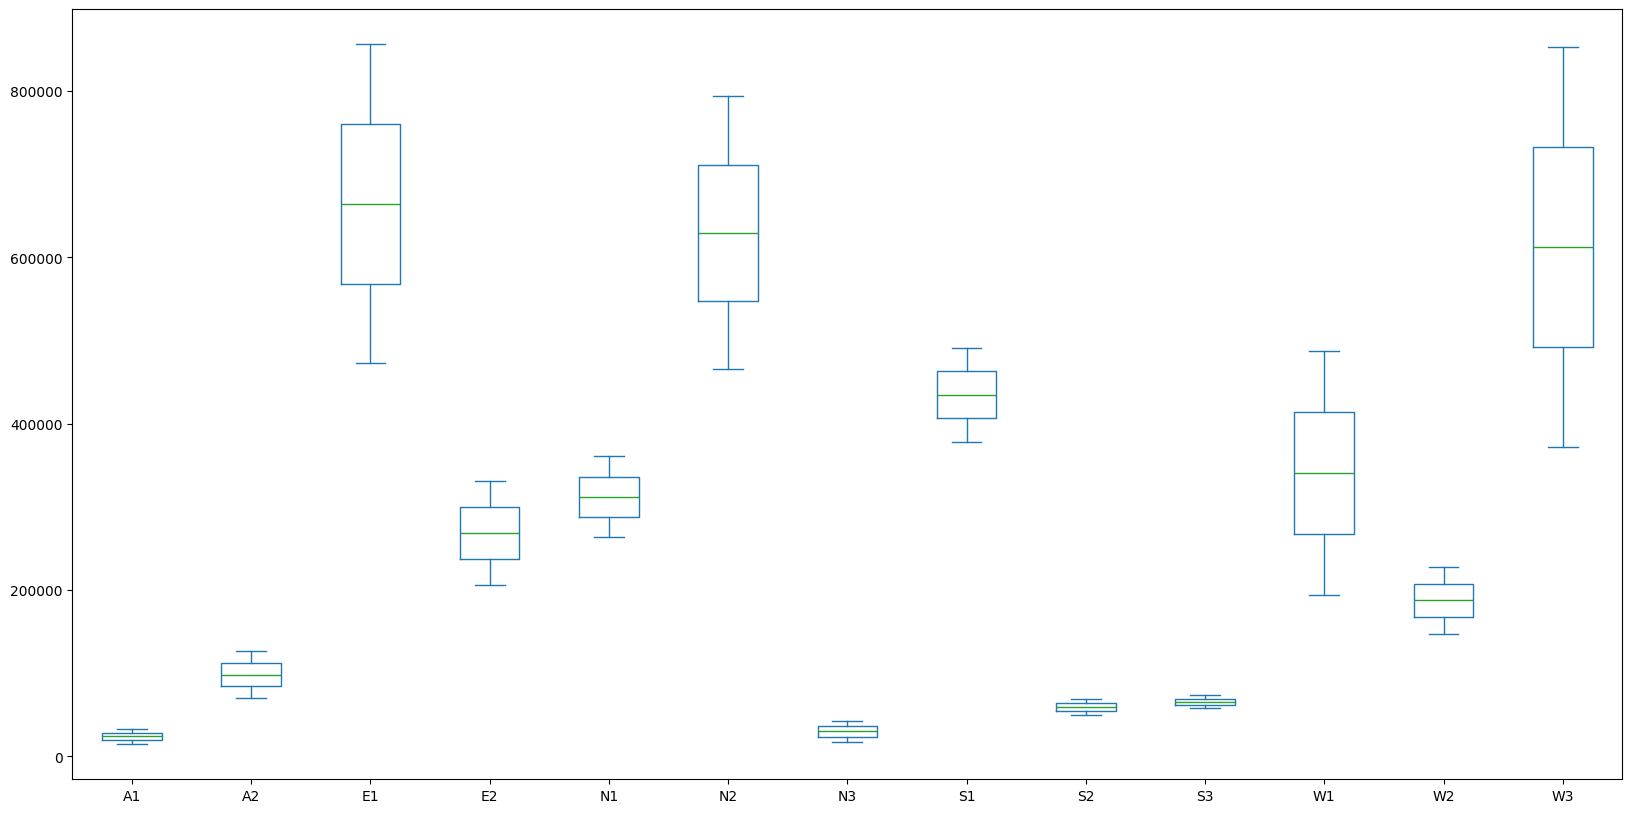

In [ ]:
pd.concat([df_month.iloc[:, 1:-2].std().rename("SD"), df_month.iloc[:, 1:-2].mean().rename("Mean")],axis=1).T.plot.box(figsize=(20, 10))

### Taking E1 (High varience) and S2 (Low varience) areas

#### Tradeline for E1 and S2

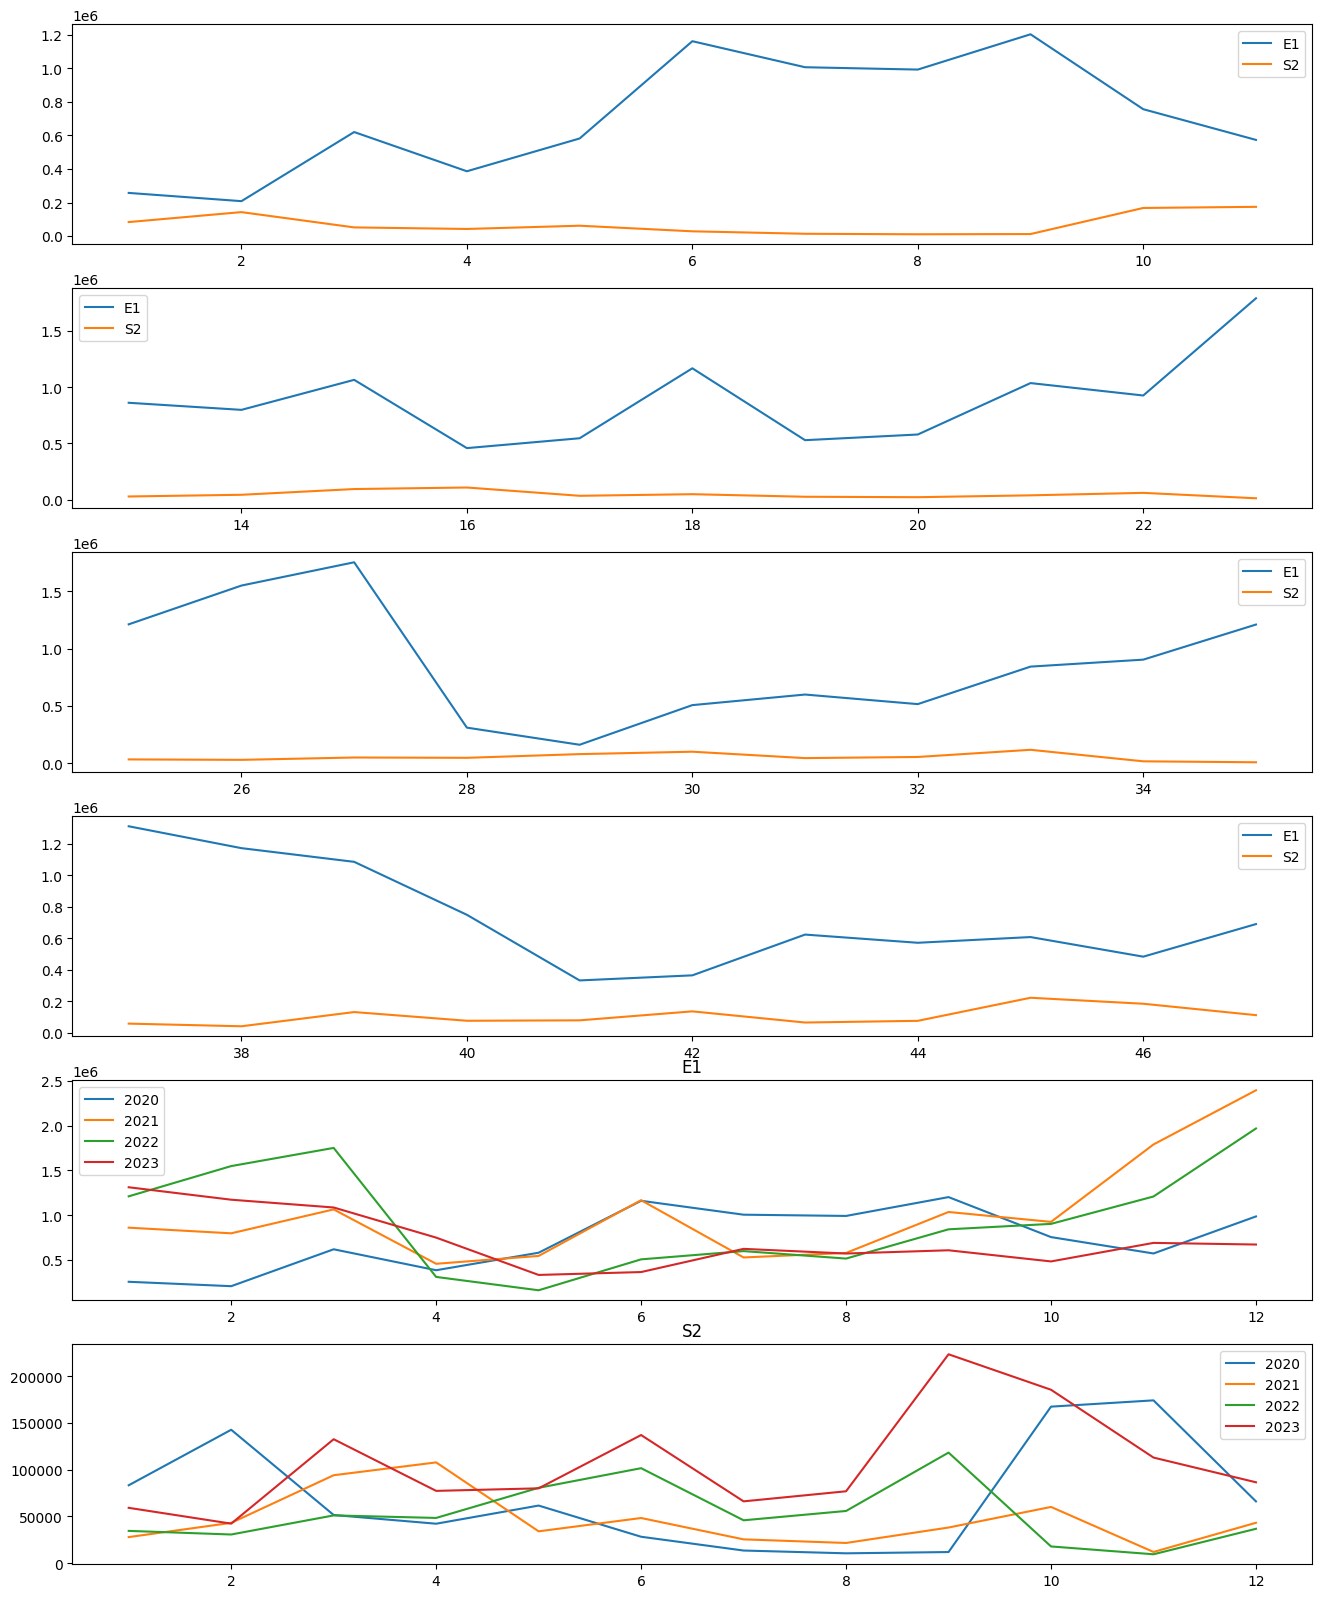

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(16,20))
year = ["2020", "2021", "2022", "2023"]
count = 0
for i in range(0, df_month.shape[0], 12):
    ax[count].plot(df_month.loc[i:i+10, "Month"], df_month.loc[i:i+10, "E1"], label="E1")
    ax[count].plot(df_month.loc[i:i+10, "Month"], df_month.loc[i:i+10, "S2"], label="S2")
    ax[count].legend()
    # ax[count].set_title(f"{year[count]}")
    count+=1
for area in ["E1", "S2"]:
    ax[count].plot(list(range(1,13)), df_month.loc[0:11, area], label="2020")
    ax[count].plot(list(range(1,13)), df_month.loc[12:23, area], label="2021")
    ax[count].plot(list(range(1,13)), df_month.loc[24:35, area], label="2022")
    ax[count].plot(list(range(1,13)), df_month.loc[36:, area], label="2023")
    ax[count].legend()
    ax[count].set_title(f"{area}")
    count+=1
plt.show()

<Figure size 1000x300 with 0 Axes>

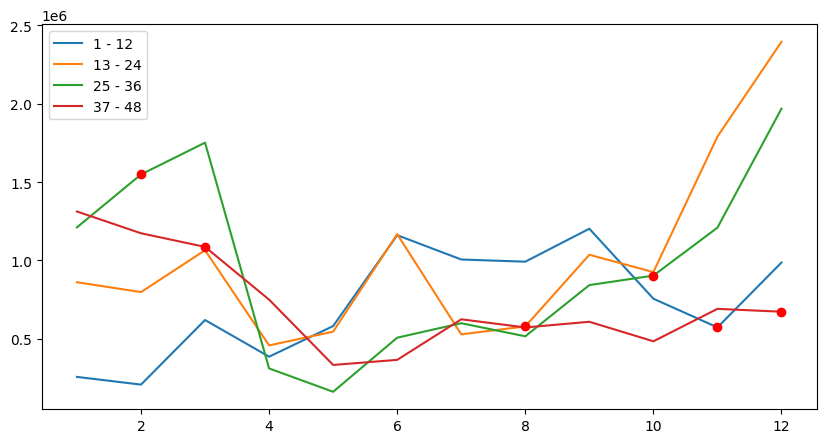

In [ ]:
def gradient(x1,y1, x2, y2):
    return (y2-y1)/(x2-x1)


def compare(a,b,c,d):
    l = sorted([a,b,c,d])
    if l[0][0]<0 and l[1][0]>0:
        return l[0][1]
    elif l[2][0]<0 and l[3][0]>0:
        return l[3][1]
    
plt.figure(figsize=(10,3))
plt.rcParams.update({'font.size': 10})
gradient_l = [(0.0,(0))]
for i in range(1,48):
    # print(df_month.loc[i-1, "Month"])
    x1,y1 = df_month.loc[i-1, "Month"],df_month.loc[i-1, "E1"]
    x2,y2 = df_month.loc[i, "Month"],df_month.loc[i, "E1"]
    # print(f'gradient of {i-1}, {i} -> {gradient(x1,y1,x2,y2)}')
    gradient_l.append((gradient(x1,y1,x2,y2),y2))

# for i in range(1, 48, 12):
#     plt.plot(df_month.loc[:11, "Month"], df_month.loc[i-1:i+10, "E1"], label=f"{i} - {i+11}", marker = '*')
#     plt.legend()
markers = []
markers_index = []
for i in range(1,12):
    if (x:= compare(gradient_l[i],gradient_l[i+12],gradient_l[i+24],gradient_l[i+36])) is not None:
        markers_index.append(i+1)
        markers.append(x)
plt.figure(figsize=(10,5))
for i in range(1, 48, 12):
    plt.plot(df_month.loc[:11, "Month"],
             df_month.loc[i-1:i+10, "E1"], label=f"{i} - {i+11}")
    plt.legend()
plt.plot(markers_index, markers, "o", color="red")

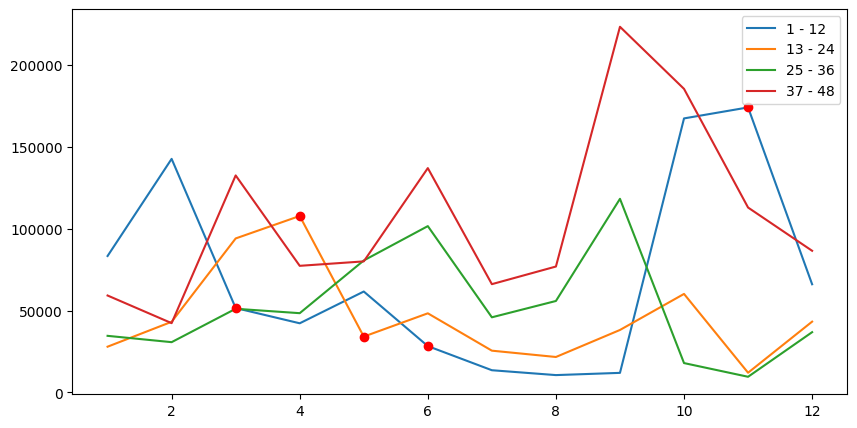

In [ ]:
gradient_l = [(0.0,(0))]
for i in range(1,48):
    # print(df_month.loc[i-1, "Month"])
    x1,y1 = df_month.loc[i-1, "Month"],df_month.loc[i-1, "S2"]
    x2,y2 = df_month.loc[i, "Month"],df_month.loc[i, "S2"]
    # print(f'gradient of {i-1}, {i} -> {gradient(x1,y1,x2,y2)}')
    gradient_l.append((gradient(x1,y1,x2,y2),y2))

# for i in range(1, 48, 12):
#     plt.plot(df_month.loc[:11, "Month"], df_month.loc[i-1:i+10, "E1"], label=f"{i} - {i+11}", marker = '*')
#     plt.legend()
markers = []
markers_index = []
for i in range(1,12):
    if (x:= compare(gradient_l[i],gradient_l[i+12],gradient_l[i+24],gradient_l[i+36])) is not None:
        markers_index.append(i+1)
        markers.append(x)
plt.figure(figsize=(10,5))
for i in range(1, 48, 12):
    plt.plot(df_month.loc[:11, "Month"],
             df_month.loc[i-1:i+10, "S2"], label=f"{i} - {i+11}")
    plt.legend()
plt.plot(markers_index, markers, "o", color="red")

### Trend line of months E1 and S2

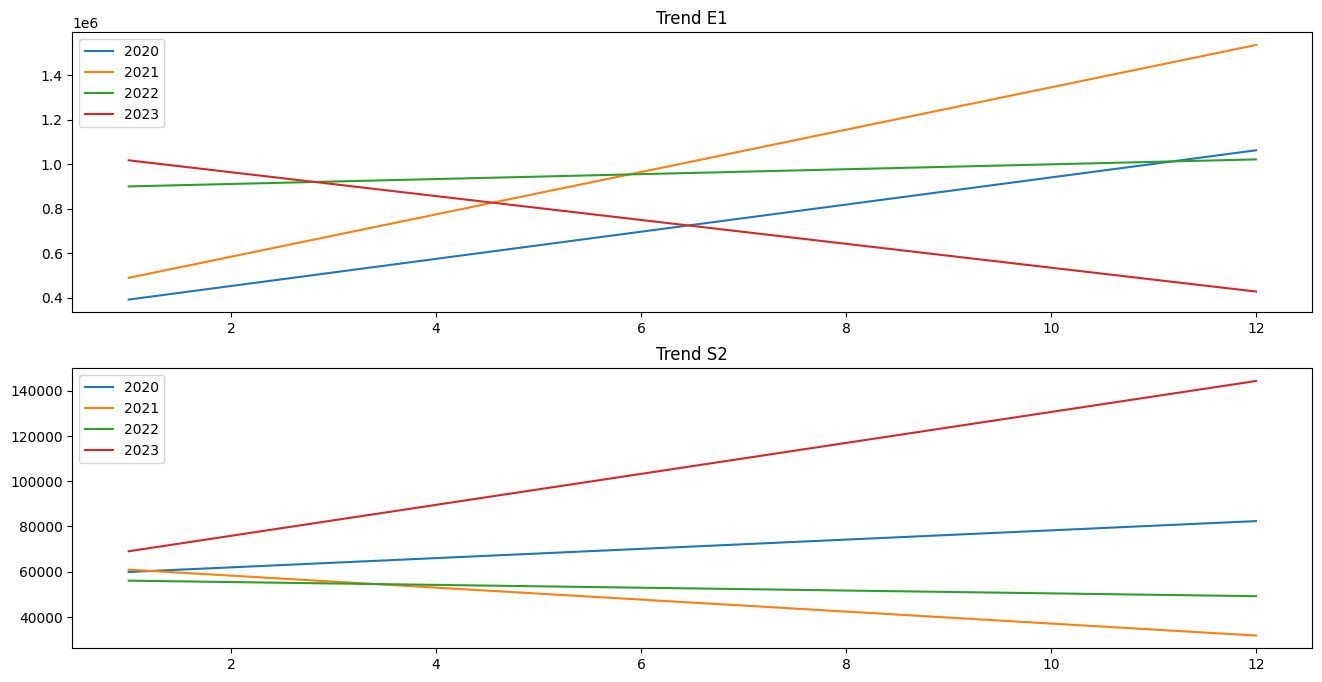

In [ ]:
e1_ts = df_month["E1"] # Highest demand and Highest varience
# Areas near E1 -> A2, N2, W3, E2 (To see if there is an offset -> When demand increase or decrease in e1...depend on another region demand)
s2_ts = df_month["S2"]
# plt.scatter(list(range(1,13)), df_month.loc[:11,area])

count = 0
window = 6
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
for area in ["E1", "S2"]:
    # ax[count].scatter(list(range(1,13)),df_month.loc[:11,area], label='2020')
    line_model_1 = stats.linregress(list(range(1,13)),df_month.loc[:11,area])
    line_model_2 = stats.linregress(list(range(1,13)),df_month.loc[12:23,area])
    line_model_3 = stats.linregress(list(range(1,13)),df_month.loc[24:35,area])
    line_model_4 = stats.linregress(list(range(1,13)),df_month.loc[36:,area])
    x = np.asfarray(list(range(1,13)))
    fitline_1 = line_model_1[0]*x+line_model_1[1]
    fitline_2 = line_model_2[0]*x+line_model_2[1]
    fitline_3 = line_model_3[0]*x+line_model_3[1]
    fitline_4 = line_model_4[0]*x+line_model_4[1]
    ax[count].plot(x, fitline_1, label='2020')
    ax[count].plot(x, fitline_2, label='2021')
    ax[count].plot(x, fitline_3, label='2022')
    ax[count].plot(x, fitline_4, label='2023')
    ax[count].legend()
    ax[count].set_title(f'Trend {area}')
    count+=1

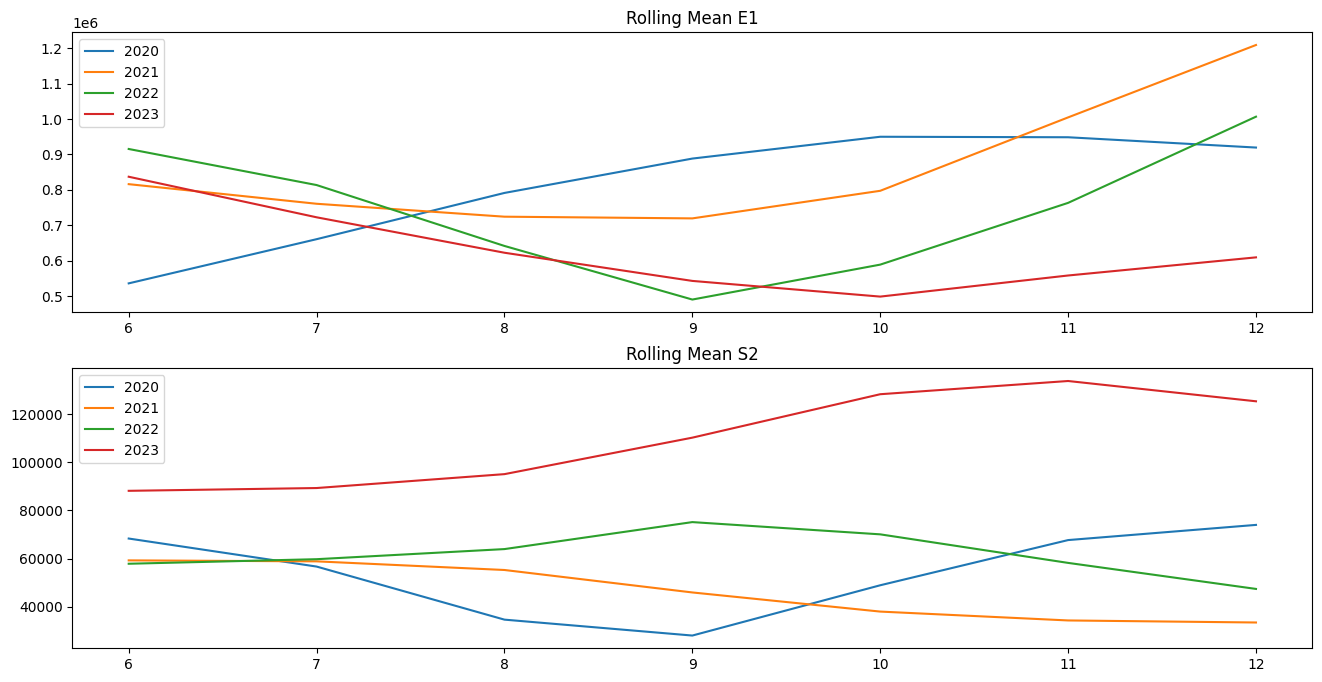

In [ ]:
count = 0
window = 6
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
for area in ["E1", "S2"]:
    ax[count].plot(list(range(1,13)),df_month.loc[:11,area].rolling(window=window, center=False).mean(), label='2020')
    ax[count].plot(list(range(1,13)),df_month.loc[12:23,area].rolling(window=window, center=False).mean(), label='2021')
    ax[count].plot(list(range(1,13)),df_month.loc[24:35,area].rolling(window=window, center=False).mean(), label='2022')
    ax[count].plot(list(range(1,13)),df_month.loc[36:,area].rolling(window=window, center=False).mean(), label='2023')
    ax[count].legend()
    ax[count].set_title(f'Rolling Mean {area}')
    count+=1

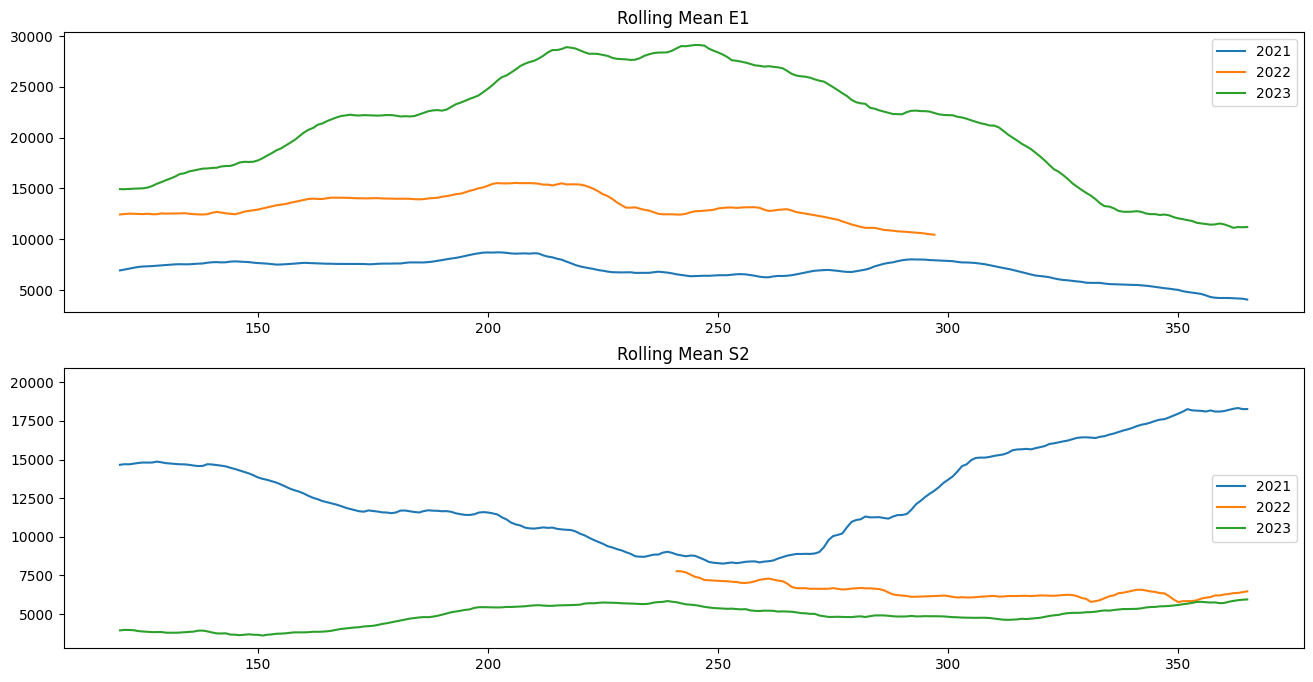

In [ ]:
# Trend Line of e1 each year
count = 0
window = 120
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
for area in ["E1", "S2"]:
    ax[count].plot(list(range(1,366)),df_daily_2021_23[(df_daily_2021_23.Date.dt.year == 2021)][area].rolling(window=window, center=False).mean(), label='2021')
    ax[count].plot(list(range(1,366)),df_daily_2021_23[(df_daily_2021_23.Date.dt.year == 2022)][area].rolling(window=window, center=False).mean(), label='2022')
    ax[count].plot(list(range(1,366)),df_daily_2021_23[(df_daily_2021_23.Date.dt.year == 2023)][area].rolling(window=window, center=False).mean(), label='2023')
    ax[count].legend()
    ax[count].set_title(f'Rolling Mean {area}')
    count+=1

In [ ]:
data = df_daily_2021_23.loc[:,['Date', 'E1']]
data.columns = ['ds', 'y']
data.fillna(0.00,inplace=True)
data

,ds,y
0,2021-01-01,5337.17
1,2021-01-02,5396.61
2,2021-01-03,4397.97
3,2021-01-04,4667.26
4,2021-01-05,4636.69
...,...,...
1090,2023-12-27,14631.52
1091,2023-12-28,15744.12
1092,2023-12-29,16012.12
1093,2023-12-30,15857.66


In [ ]:
m = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, n_changepoints=3)
m.fit(data, freq="D", epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (35) is too small than the required number                     for the learning rate finder (226). The results might not be optimal.
Finding best initial lr: 100%|██████████| 226/226 [00:02<00:00, 77.47it/s]


Epoch 953:  95%|█████████▌| 953/1000 [00:00<?, ?it/s, loss=0.0496, v_num=27, MAE=5.03e+3, RMSE=7.18e+3, Loss=0.0546, RegLoss=0.000]             

In [ ]:
future = m.make_future_dataframe(data, periods=80, n_historic_predictions=True)
forecast = m.predict(future)
forecast['y']=pd.concat([df_daily_2021_23['E1'],jan_df['E1']], axis=0, ignore_index=True)
forecast

WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\e

Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 580.13it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2021-01-01,5337.17,-501.809570,3374.200684,-3876.010254
1,2021-01-02,5396.61,-272.969055,3384.804199,-3657.773193
2,2021-01-03,4397.97,-35.591473,3395.407471,-3430.999023
3,2021-01-04,4667.26,209.946548,3406.010986,-3196.064453
4,2021-01-05,4636.69,462.805237,3416.614258,-2953.809082
...,...,...,...,...,...
1170,2024-03-16,36423.97,22800.023438,23185.234375,-385.210236
1171,2024-03-17,25318.18,23228.291016,23209.753906,18.536551
1172,2024-03-18,23273.95,23672.345703,23234.275391,438.070435
1173,2024-03-19,NaN,24127.923828,23258.796875,869.126709


In [ ]:
m.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [ ]:
m.plot_parameters(components=['trend', 'seasonality'])

ERROR - (NP.plotly.plot_parameters) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:47

In [ ]:
data_s2 = df_daily_2021_23.loc[:,['Date', 'S2']]
data_s2.columns = ['ds', 'y']
data_s2.fillna(0.00,inplace=True)
data_s2

,ds,y
0,2021-01-01,9387.48
1,2021-01-02,13055.97
2,2021-01-03,13176.51
3,2021-01-04,15575.81
4,2021-01-05,15496.28
...,...,...
1090,2023-12-27,12617.75
1091,2023-12-28,8182.95
1092,2023-12-29,5435.54
1093,2023-12-30,7813.36


In [ ]:
a2 = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, n_changepoints=2)
a2.fit(data_s2, freq="D", epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._i

Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 2243.03it/s, loss=0.0583, v_num=26, MAE=4.87e+3, RMSE=7.4e+3, Loss=0.0547, RegLoss=0.000]   


,MAE,RMSE,Loss,RegLoss,epoch
0,24887.894531,30020.250000,0.568855,0.0,0
1,19317.023438,24222.279297,0.417075,0.0,1
2,14944.979492,19343.023438,0.300048,0.0,2
3,12070.473633,15536.621094,0.222628,0.0,3
4,10399.787109,13212.182617,0.177792,0.0,4
...,...,...,...,...,...
995,4844.359375,7373.278809,0.054703,0.0,995
996,4868.025879,7378.224121,0.054799,0.0,996
997,4819.405762,7357.572754,0.054046,0.0,997
998,4826.555176,7415.686035,0.053676,0.0,998


In [ ]:
future = a2.make_future_dataframe(data_s2, periods=80, n_historic_predictions=True)
forecast = a2.predict(future)
forecast['y']=pd.concat([df_daily_2021_23['S2'],jan_df['S2']], axis=0, ignore_index=True)
forecast

WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\e

Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 120.84it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2021-01-01,9387.48,12422.261719,10670.437500,1751.824341
1,2021-01-02,13055.97,12448.224609,10688.040039,1760.184814
2,2021-01-03,13176.51,12480.281250,10705.642578,1774.638916
3,2021-01-04,15575.81,12518.217773,10723.244141,1794.972656
4,2021-01-05,15496.28,12561.661133,10740.847656,1820.813599
...,...,...,...,...,...
1170,2024-03-16,18085.17,4878.368652,4862.677734,15.690825
1171,2024-03-17,17361.03,5057.050293,4859.911621,197.138275
1172,2024-03-18,14906.40,5241.088379,4857.146484,383.941895
1173,2024-03-19,NaN,5428.617188,4854.381348,574.236023


In [ ]:
a2.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [ ]:
a2.plot_parameters(components=['trend', 'seasonality'])

ERROR - (NP.plotly.plot_parameters) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_model_parameters_plotly.py:47

## After removing Trend and Sesonality

### Removing Trend

In [ ]:
df_daily_2021_23

In [66]:

n = 3
for i in range(n):
   
    for j in range(i):
        print(' ', end=' ')
    if i %2 == 0:
        print('*', end=' ')
    else:
        print('#',end=' ')
    if i==0:
        for j in range(n):
            print('# *', end=' ')
    print()
for i in range(n+1):
    for j in range(n-i):
        print(' ', end=' ')
    if i %2 == 0:
        if n%2==0:
            print('*', end=' ')
        else:
            print('#', end=' ')
    else:
        if n%2==0:
            print('#', end=' ')
        else:
            print('*', end=' ')
    if i==n:
        for j in range(n):
            print('# *', end=' ')
    
    print()

* # * # * # * 
  # 
    * 
      # 
    * 
  # 
* # * # * # * 
